<h1 align = "center">Genre Classification by Lyric Analysis</h1>
<h2 align = "center">Data mining Project</h2>
<h4 align = "center">
    
    Nathan Jenkins
    Vincent Potrykus
    Jordan Sandberg
</h4>

<h2>Introduction</h2>
<p>
Online streaming platforms like Apple Music and Spotify add new songs to their collection daily. Each platform gives users the ability to listen to and download millions unique of songs. These songs are catalogued and categorized so that music listeners may find new songs that match their unique tastes. 

Organizing songs by genre is an old and familiar technique to categorize music and make it easier for listeners to find songs they like. To classify songs into genres manually, someone would need to listen to it and select the genre that best applies. This is hard and very time-consuming job. They would require a knowledge of many different genres, types of music and the nuances between them. 

Machine learning and text lyric analysis can aid in this pursuit. 
</p>

<p>
This report serves to identify if there is a link between word frequency within the lyrics of a song and genre that the song belongs to. The notebook will analyses the effectiveness of different machine learning techniques, algorithms and natural language processing tools to determine the correlation between lyrics and musical genres. 
</p>

<h2>The Dataset</h2>
<p>The dataset can be obtained from Google Drive at the following 
    <a href = "https://drive.google.com/file/d/1rbkPBVdfxdYFQrEmcGFpfeOHuYdM0W8v/view?usp=sharing">link. </a>
    <br>
    Alternatively it can be downloaded from Kaggle at the following <a href = "https://www.kaggle.com/gyani95/380000-lyrics-from-metrolyrics/data">link. </a></p>
<p><font color = red>
<strong>IMPORTANT: Place the <i>lyrics.csv</i> file in the same folder as the <i>project.ipynb</i> file (this file).</strong></font></p>


In [41]:
# import the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('lyrics.csv', index_col=0)

# show the format of the data
data.head()

,song,year,artist,genre,lyrics
index,,,,,
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


<p>This dataset contains 380,000 rows in the format <i>song/year/artist/genre/lyrics</i>/</p>
<p>Each song ranges from a number of genres, including: <b>Rock, Pop, Hip-Hop, Metal, Country, Jazz, Electronic, Indie, R&B, and Folk</b>. For the context of this project, the columns of interest are <i>lyrics</i>, the attributes, and <i>genre,</i> the target class. Where the lyrics will first need to be vectorized, where each word is a token and the frequency of occurrence related to their importance of classifying the song.</p>

<h3>General Considerations for the Lyric Dataset</h3>

<p>It should be expressed that certain genres of music rely more heavily on melodies than lyrics to distinguish them. In particular Jazz, and Electronic are two genres that historically do not contain many lyrics and are typically destinguished by the melody. We can expect these genres to perform worse than others genres with more attributes</p>

Music is art by convention and does not conform the structured categories, for this reason the lines dividing musical genres are often vague where certain songs may overlap. That being said the following genres of importance are outlined below.</p>

- Country
- Electronic
- Folk
- Indie
- Jazz
- Metal
- Pop
- R&B
- Rock


<h2>Data Preprocessing</h2>
<h3>Removing unnecessary data</h3>

<p>The first step of the process is preprocessing the data so that we can use it in the algorithm. <br>
    
   First, we remove all rows of non-importance from the collection, that is, rows where the genre is "Not Available" or "Other". Second, we delete all the rows that do not contain lyrics. In the next step, Count Vectorizer, we remove all "non-words", that is emojis and all tokens that are not composed solely of the letters of the alphabet, and "stop words", that is common words that are unlikely to be specific to a document, such as "and", "the", "a", etc. This step also deletes all the words that contain numbers.</p>


In [42]:
# preprocess the data

# remove all the genres with not avaliable and other
data = data[data.genre != 'Not Available']
data = data[data.genre != 'Other']
# data = data[data.genre != 'Folk']
# data = data[data.genre != 'R&B']
# data = data[data.genre != 'Indie']
# data = data[data.genre != 'Electronic']
# data = data[data.genre != 'Jazz']

# remove all the data with no lyrics
data.dropna(subset=['lyrics'], inplace=True)

# remove all the data without english lyrics

# sample a smaller subset of data since it is quite large for processing
data = data.sample(n=10000, random_state=1)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords

# max_features : a maximum of 1500 columns
# min_df : the word must occur in a mininum of 5 documents
# max_df : the word occurs in less than 70 percent of the documents (words appearing in all are useless)
nltk.download('stopwords')
vectorizer = CountVectorizer(min_df=0.01, max_df=0.9, stop_words=stopwords.words('english'), token_pattern = '[a-zA-Z]+')

# creates a bag of words
X_bag_of_words = vectorizer.fit_transform(data.lyrics.values.astype('str'))

# creates y, which is our genre class
y = data.genre

# visualize the transformed data 
pd.DataFrame(X_bag_of_words.toarray(), columns=vectorizer.get_feature_names()).head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /usr/local/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,across,act,afraid,age,ago,ah,ahead,aint,air,al,...,ya,yea,yeah,year,years,yes,yesterday,yet,yo,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,7,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h3>Count Vectorizer</h3>

This step converts the initial document to a vector of tokens. Where each token is the amount of times the word appears in the document. This step is the base for all calculations.

<h4>Important metrics to consider</h4>

1. Max features: The maximum number of words to consider as attributes
2. min_df : The minimum number of documents the word must appear in to be considered.
       - if a word appears in very few song lyrics then this word has little affect on determining the class
3. max_df : The word appears in a maximum of this many documents. 
       - if a word appears in too many documents then it has no affect on determine the class
       

<h3>TF-IDF Vectorizer</h3>
<p><a href = "http://www.tfidf.com">"Term frequency inverse document"</a> is a more sophisticated method of vectorization. Each word is assigned a weight from 0 to 1 that is a measure of the words importance to collection of documents. That is, this metric is proportional to the amount of times the word appears in the document, offset by the amount of times the word appears in the entirety of the collection</p>
<p>The metric $\mathit{TFIDF}$ is calculated by: $\mathit{TFIDF} = \mathit{TF} * \mathit{IDF}$
</p>

$$\mathit{TF}(t) = \frac{\text{number of times term t appears in the document}}{\text {total number of terms in the document}}$$

$$\mathit{IDF}(t) = \ln{\left( \frac{\text{Total number of documents}}{\text{Number of documents with term t}}\right) }$$

<p>If all the document contains the term $t$, this term will have a score of 0. Since $\mathit{TF} * ln(1) = 0$</p>
<p>If the term t is rare, then $\mathit{IDF}$ will be larger. Then $\mathit{TF-IDF}$ will be larger</p>




In [44]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X_TFID = tfidfconverter.fit_transform(X_bag_of_words)

# notice how the data is now altered based on the word frequency
pd.DataFrame(X_TFID.toarray(), columns=vectorizer.get_feature_names()).head()

,across,act,afraid,age,ago,ah,ahead,aint,air,al,...,ya,yea,yeah,year,years,yes,yesterday,yet,yo,young
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.062942,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.256325,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


<h3>Vocabulary Analysis</h3>
<p>Here we are going to look at each of the vocabularies the genres produce, analyze them and make a prediction where the algorithms might have trouble when guessing. We will illustrate the frequency of the most common words by using a wordcloud.</p>
<p>Visually expressed in the world cloud, there are certain words that occur frequently with all genres, using the TF-IDF vectorizer should mitigate somewhat against high word frequency.

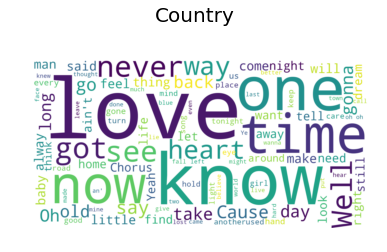

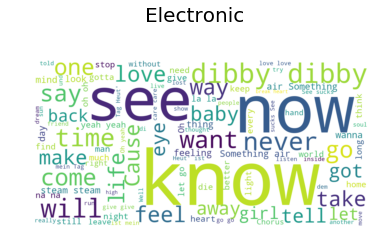

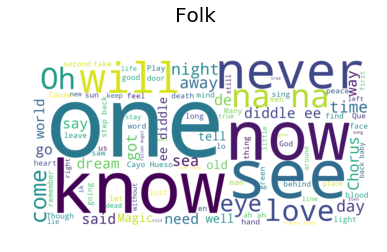

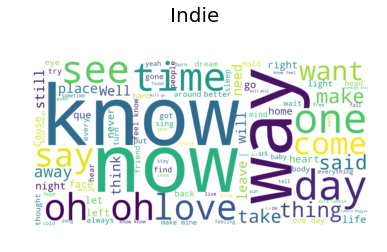

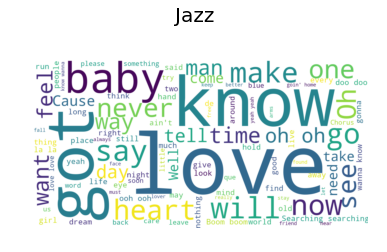

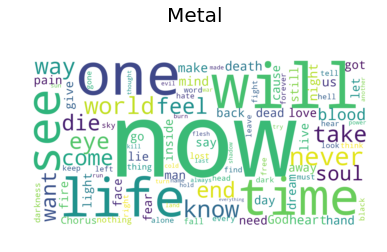

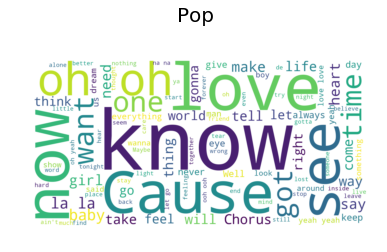

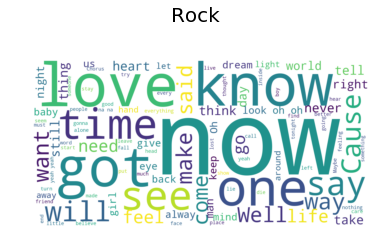

In [45]:
from wordcloud import WordCloud

# group the data by the genre
def create_wordcloud(genre):
    text = " ".join(lyric.replace('\n', ' ') for lyric in data[data["genre"]==genre].lyrics)
    fig = plt.figure()
    fig.suptitle(genre, fontsize=20)
    wordcloud = WordCloud(max_words=100, background_color="white", scale = 4).generate(text)
    plt.axis("off")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()


create_wordcloud("Country")
create_wordcloud("Electronic")
create_wordcloud("Folk")
create_wordcloud("Indie")
create_wordcloud("Jazz")
create_wordcloud("Metal")
create_wordcloud("Pop")
create_wordcloud("Rock")

# Display the generated image:


This visualization is powerful in showing that there are lyrics which appear frequently accross multiple genres such as the lyrics *know*, *now*, *see* and *love*. These lyrics will be the most troublesome when classifying. 

<h3>Imbalanced Data</h3>
<p>The following plot depicts the amount of data we had for each genre. It shows us that the dataset has some very imbalanced data. There is a disproportionate amount of rock songs compared to others. With this dataset, if an algorithm guessed rock 100% of the time, it would achieve around 50% accuracy for this class. </p>

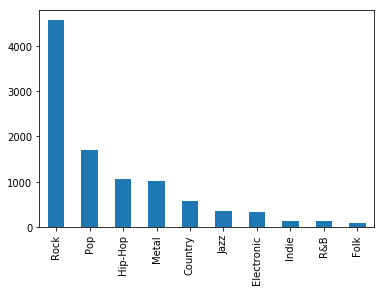

In [46]:
y.value_counts().plot(kind='bar')

<p>To address the issue of <b>imbalanced data</b>, we are going to oversample the data from the under represented classes.</p>

<p><code>imblearn.oversampling.RandomOverSampler</code> does this by picking random samples with replacement.</p>



In [47]:
# split X and y into training a test sets
from sklearn.model_selection import train_test_split
X = X_TFID
X_train, X_test, y_train, y_test = train_test_split(X, y)

<p>Split the data into training and testing using <code>train_test_splot</code> from <code>sklearn</code></p>


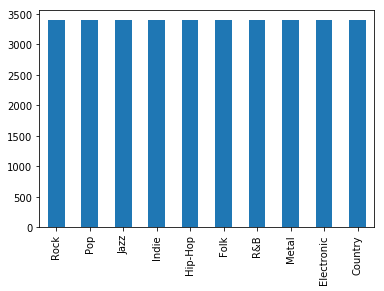

In [48]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

X_train_oversampled, y_train_oversampled = RandomOverSampler().fit_resample(X_train, y_train)
pd.DataFrame(y_train_oversampled)[0].value_counts().plot(kind='bar')

<p>By employing the sampling techniques, each class now has an equivalent amount of rows that can be used to train the algorithms. It is important that these rows are only used for training, and the algorithms are evaluated on the unbiased data, since the unbiased data is more representational of the population, and real world analyses.</p>

<h2>Experiment and Analysis</h2>
<p>The following algorithms will be evaluated to in their ability to classify the data:</p>
    <ol>1. Random Forest Classifier</ol>
    <ol>2. Multinomial Bayes</ol>
    <ol>3. Logistic Regression</ol>
    
The following are functions which will assist us in making these evaluations.

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# ignore the warnings
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"
LOG_REG_ITER = 5000 # this is a const used to specify the max iterations the LogisticRegression function can use
classifers = [RandomForestClassifier(), MultinomialNB(), LogisticRegression(max_iter=LOG_REG_ITER)]
                                                                            

In [50]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
def train_predict(classifier, X_train=X_train, y_train=y_train):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    evaluation = {
        'id' : classifier.__class__.__name__,
        'report': classification_report(y_test, y_pred), 
        'matrix': confusion_matrix(y_test, y_pred),
        'accuracy':  accuracy_score(y_test, y_pred),
        'f1_macro': f1_score(y_test, y_pred, average='macro')
    }
    return (evaluation)

In [51]:
def vis_accuracy(accuracy, index):
    data = pd.DataFrame(accuracy, columns=['accuracy'], index = index)
    ax = sns.barplot(data = data, x = data.index, y = 'accuracy')
    plt.show()

In [52]:
def vis_confusion(confusion_matrix, size = (20, 10), title = 'Confusion Matrix', 
    labels=['Country', 'Electronic', 'Folk', 'Hip-Hop', 'Indie', 'Jazz', 'Metal', 'Pop', 'R&B', 'Rock']):
    df_cm = pd.DataFrame(confusion_matrix, index = labels, columns = labels)
    plt.figure(figsize = (size[0],size[1]))
    ax = plt.axes()
    sns.heatmap(df_cm, annot=True, fmt='g')
    ax.set_title(title)
    plt.show()

In [ ]:
def vis_bar(data, column, index):
    data = pd.DataFrame(data, columns=[column], index = index)
    ax = sns.barplot(data = data, x = data.index, y = column)
    plt.show()

### Multinomial Naive Bayes

First, we classify using the Multinomail Naive Bayes classifier.

<p>Lets first compare how successful training with the unbiased vs the sampled bias data is with multinomial bayes to see if sampling the data made a difference</p>

In [53]:
over_eval = train_predict(MultinomialNB(), X_train = X_train_oversampled, y_train = y_train_oversampled)
unbias_eval = train_predict(MultinomialNB())

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted'

As mentioned briefly in the "imbalanced data section," with imbalanced data it might be easy to get high accuracy without making useful predictions. If the data is highly scewed then always predicting the majority will result in a high accuracy. Even though the classifier is not making any useful, smart prediction. For this reason, accuracy may not the best measure algorithms preformance on imbalanced data.

A confusion matrix is a better metric for evaluation, where it visulized which classes the classifier predicted and their true values.

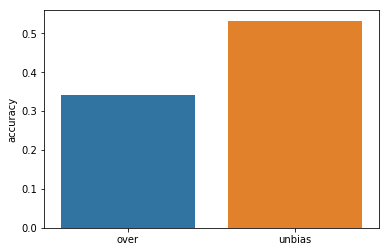

In [54]:
vis_accuracy([ over_eval['accuracy'], unbias_eval['accuracy']], ['over', 'unbias'])

With the graph above, we can see a visualization of this false sense of accuracy with the unbiased data.

Next, the confusion matrix is created for the unbiased and oversampled data respectively.

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


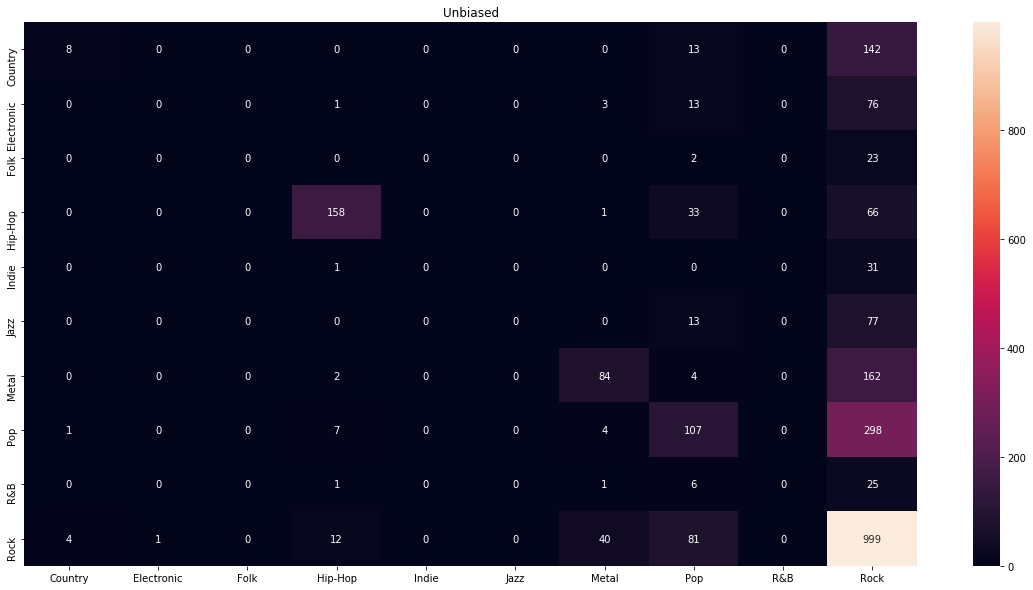

In [34]:
vis_confusion(unbias_eval['matrix'], title = 'Unbiased')

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


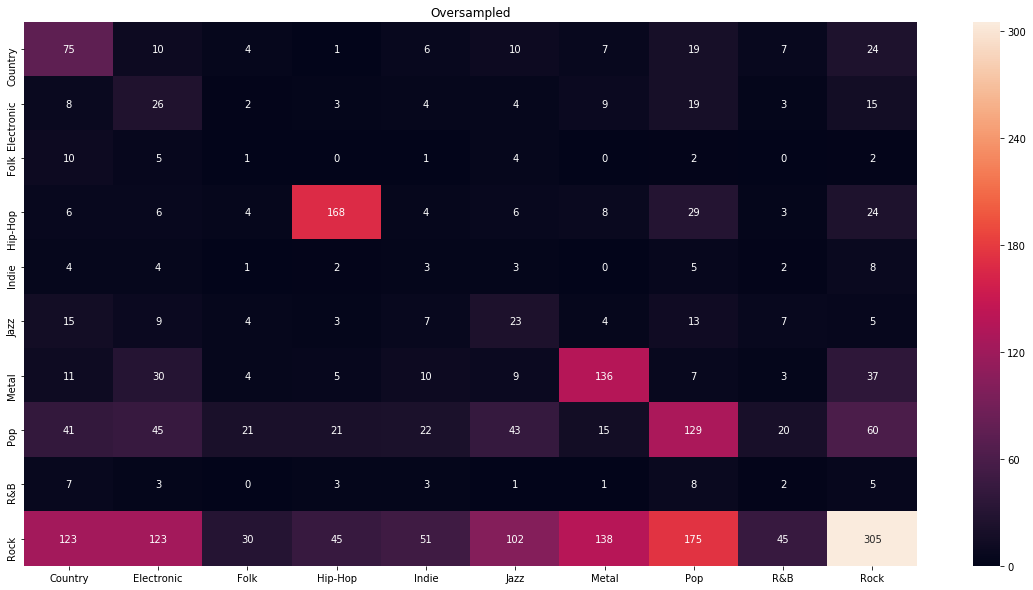

In [35]:
vis_confusion(over_eval['matrix'], title = 'Oversampled')

<h4>Over sampled vs biased data with Multinomial Bayes</h4>
<p>
As explained above, even though the accuracy of one classifier may be higher, it does not mean that the classifier performs better with skewed data.
</p>
<p>In the first confusion matrix, trained with unbiased, skewed data it almost always predicts Rock. This is to be expected since the dataset contained a large majority of Rock songs and the classifier was rewarded for choosing Rock the majority of the time. Alternatively, the second confusion matrix, with data trained on the oversampled dataset performs better, and makes smarter classifications overall. It has a higher percentage along its diagonal, that is, it predicted more correct values overall in all categories.
</p>
<p>It should be noted that by training with the oversampled data and testing on the unbiased data has some problems. The classifier is no longer able to recognize the distribution of genres in the dataset. The classifier performs worse classification of the Rock genre since it believes that each song genre has an equal probability of occuring, when in reality the distribution of songs in favoured greatly to Rock.</p>

<h3>ROC curves for the most popular genres using Multinomial Naive Bayes</h3>

Eith the confusion matricies created, the ROC graphs can be plotted. We will plot the ROC for the oversampled data for the *Rock*, *Pop*, *Metal* and *Jazz* genres. 

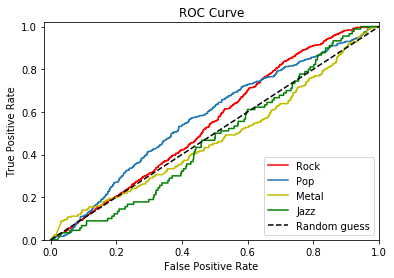

In [36]:
 #source https://medium.com/hugo-ferreiras-blog/confusion-matrix-and-other-metrics-in-machine-learning-894688cb1c0a

from sklearn.metrics import roc_curve
mn = MultinomialNB()


mn.fit(X_train_oversampled, y_train_oversampled)
y_pred = mn.predict(X_test)
y_pred_prob = mn.predict_proba(X_test)[:,1]

# make sure we don't try to convert a list into a list again
if isinstance(y_pred_prob, list):
    y_pred_prob = y_pred_prob.tolist()
    y_test = y_test.tolist()

fpr1, tpr1, thresholds = roc_curve(y_test, y_pred_prob, 'Rock')
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred_prob, 'Pop')
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred_prob, 'Metal')
fpr4, tpr4, thresholds = roc_curve(y_test, y_pred_prob, 'Jazz')


# create plot
plt.plot(fpr1, tpr1, color='r', label = "Rock")
plt.plot(fpr2, tpr2, label = "Pop")
plt.plot(fpr3, tpr3, color='y', label = "Metal")
plt.plot(fpr4, tpr4, color='g', label = "Jazz")

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

Looking at the above ROC graph, we can see that, out of these four generes, Pop has the greatest True Positive Rate. If we go back and look at the word cloud analysis for pop, it can be see that this genre does not contain very many words which appear frequently accross multiple genres. 

### Logistic Regression

Following the Multinomial Bayes classification is the Logistic Regression.

As with Multinomial Bayes, the classification will be done on oversampled data and the unbiased data. From the code bolow, it can be seen that `LogisticRegression()` is now being used in the train_predict function.

<span style="color: red">Warning:</span> the following two lines of code will take a long time to run.

In [60]:
over_eval = train_predict(LogisticRegression(max_iter=5000), X_train = X_train_oversampled, y_train = y_train_oversampled)
unbias_eval = train_predict(LogisticRegression(max_iter=5000))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cl

With the predictions done, we can compare the accuracy of Logistic Regression for oversampled and unbiased data.

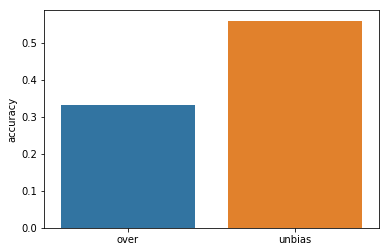

In [61]:
vis_accuracy([ over_eval['accuracy'], unbias_eval['accuracy']], ['over', 'unbias'])

In the graph above, it can be seen that, similar to Multinomial Bayes classification, the unbiased data appears to be much more accurate. Next, we will take a look at the confusion matrix to get a better reading on the data.

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


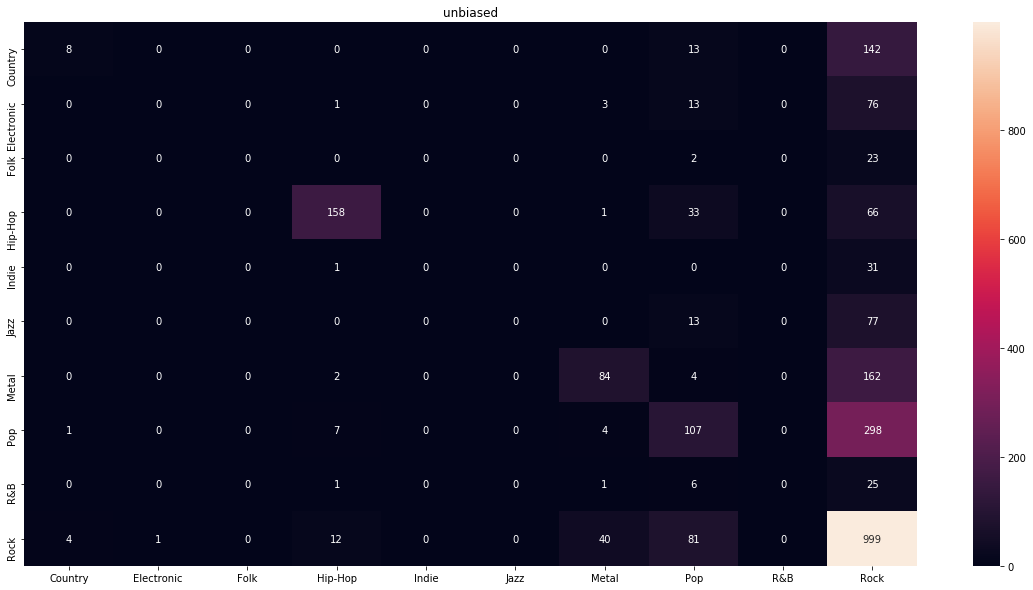

In [37]:
vis_confusion(unbias_eval['matrix'], title="unbiased")

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


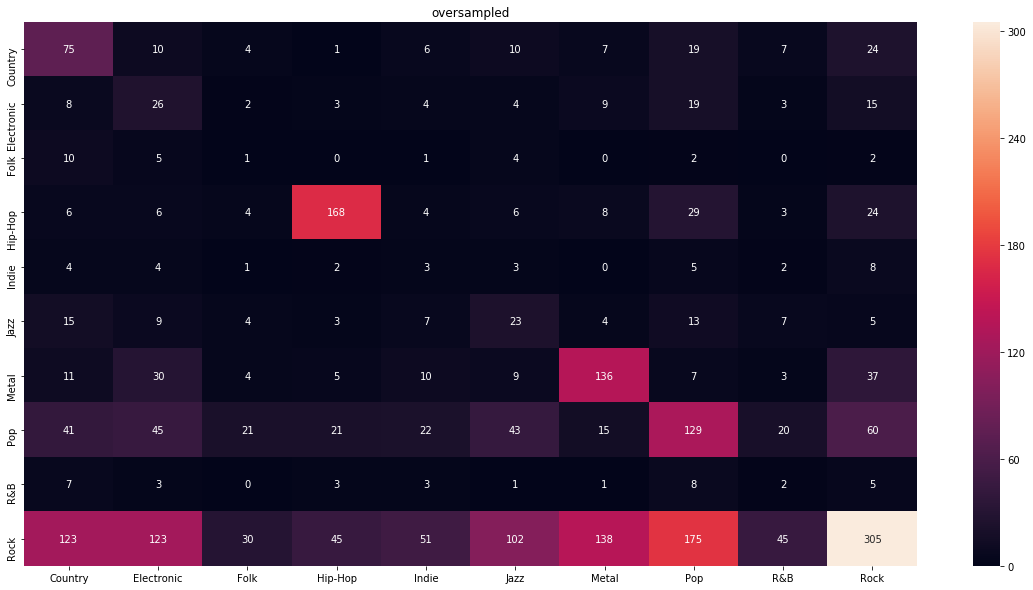

In [38]:
vis_confusion(over_eval['matrix'], title="oversampled")

The confusion matrix provides a better evvaluation of what is happening with the data. As with the Multinomial Naive Bayes classification, the Logistic Regression is classifying mostly rock songs for the unbiased data. When the oversampled data is looked at, however, we see a much more balanced confusion matrix. 

Next, we can evaluate the ROC curve.

<span style="color: red">Warning:</span> the following two lines of code will take a long time to run.

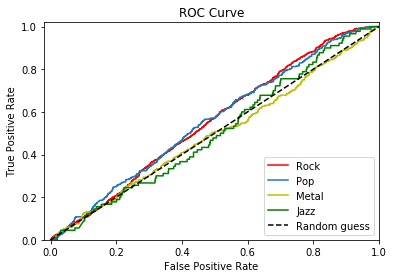

In [39]:
lr = LogisticRegression(max_iter=5000)


lr.fit(X_train_oversampled, y_train_oversampled)
y_pred = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)[:,1]

# make sure we don't try to convert a list into a list again
if isinstance(y_pred_prob, list):
    y_pred_prob = y_pred_prob.tolist()
    y_test = y_test.tolist()

fpr1, tpr1, thresholds = roc_curve(y_test, y_pred_prob, 'Rock')
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred_prob, 'Pop')
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred_prob, 'Metal')
fpr4, tpr4, thresholds = roc_curve(y_test, y_pred_prob, 'Jazz')


# create plot
plt.plot(fpr1, tpr1, color='r', label = "Rock")
plt.plot(fpr2, tpr2, label = "Pop")
plt.plot(fpr3, tpr3, color='y', label = "Metal")
plt.plot(fpr4, tpr4, color='g', label = "Jazz")

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

The ROC graph for Logistic Reg

<h3>Comparing Confusion matrix of multinominal bayes, random forest and logistic regression</h3>

<p>The following section will analyze the confusion matrix and the relative performance of different classification algorithms trained on the oversampled dataset and tested on the unbiased set.</p>

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


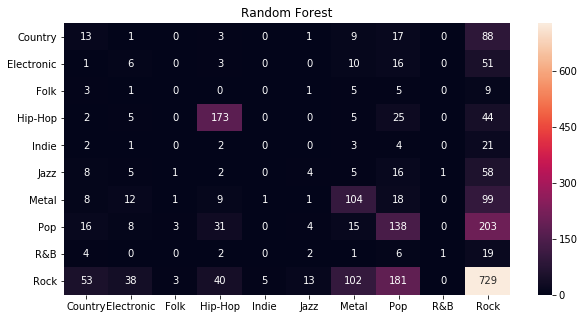

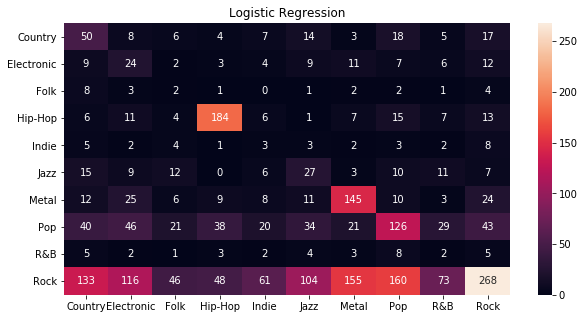

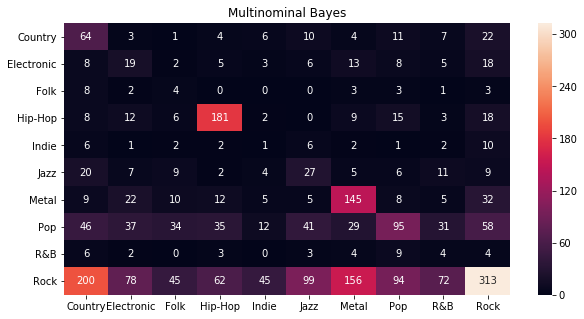

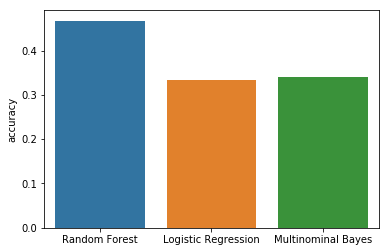

In [65]:
forest_eval = train_predict(RandomForestClassifier(), X_train = X_train_oversampled, y_train = y_train_oversampled)
logreg_eval = train_predict(LogisticRegression(), X_train = X_train_oversampled, y_train = y_train_oversampled)
multi_eval = train_predict(MultinomialNB(), X_train = X_train_oversampled, y_train = y_train_oversampled)

vis_confusion(forest_eval['matrix'], size = (10, 5), title='Random Forest')
vis_confusion(logreg_eval['matrix'],  size = (10, 5), title= 'Logistic Regression')
vis_confusion(multi_eval['matrix'],  size = (10, 5), title= 'Multinominal Bayes' )

vis_accuracy([ forest_eval['accuracy'], logreg_eval['accuracy'], multi_eval['accuracy']], 
             ['Random Forest', 'Logistic Regression', 'Multinominal Bayes'])

<h3>Macro f1-Average as a Measure of Classifier Effectiveness</h3>
<p>Macro average will treat each class independently. This f1 average is computed as a average taken from all the classes. Multinominal Bayes has the highest f1-score macro average for each of the classes.
</p>

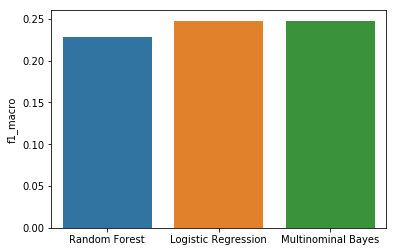

In [66]:
vis_bar([ forest_eval['f1_macro'], logreg_eval['f1_macro'], multi_eval['f1_macro']], 'f1_macro',
             ['Random Forest', 'Logistic Regression', 'Multinominal Bayes'])

<h3>Conclusion</h3>

<p>This project has shown that a lot of songs try to reuse words from their specific genres, however there are some some songs who's genres are harder to guess using just lyrics. As we have shown in this report, the Multinomial Naive Bayes classifier was marginally better than the Linear Classifier for Metal, Rock and Pop, but performed significantly lower.


</p>